In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2


from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor, Compose, Resize, CenterCrop
from matplotlib import pyplot as plt
from src.runner import Runner

TRANSFORMS = Compose([Resize(266), CenterCrop(256), ToTensor()])
dataset = ImageFolder(root="./src/dataset/imagenet/val", transform=TRANSFORMS)
loader = DataLoader(
    dataset=dataset,
    batch_size=1,
    shuffle=False,
    num_workers=0,
)


g:\github\Grivj\adversarial_detection_code\venv\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'G:\github\Grivj\adversarial_detection_code\venv\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


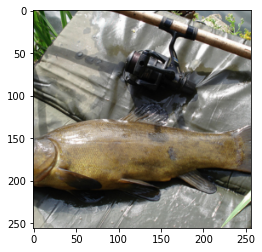

In [2]:
x, y = next(iter(loader))

plt.imshow(x[0].permute(1, 2, 0))

In [7]:
import torch
from torch import nn


class LinearNet(nn.Module):
    def __init__(self, n_classes: int):
        self.n_classes = n_classes
        super().__init__()

        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(3 * 256 * 256, self.n_classes),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.network(x)


LN = LinearNet(10).eval()


for batch in loader:
    x, y = batch
    print(LN(x), y)


In [8]:
runner = Runner(
    loader=loader,
    model=LN,
)

In [14]:
runner.run_accuracy()

  0%|          | 0/20 [00:00<?, ?it/s]

Accuracy of 10.00% (2/20)
Function 'run_accuracy' executed in 0.2842s


In [17]:
stds = [
    0.0000,
    0.0010,
    0.0020,
    0.0030,
    0.0040,
    0.0050,
    0.0060,
    0.0070,
    0.0080,
    0.0090,
    0.0100,
]


# runner.run(pickle_path = "./results/run1.pt", standard_deviations = stds)


In [18]:
from src.attack import Attack
from foolbox import attacks
a = Attack(module=attacks.basic_iterative_method.L2BasicIterativeAttack, epsilon=1)


runner.run_with_attack("./results/run1bim.pt", stds, attack=a)

  0%|          | 0/20 [00:00<?, ?it/s]

Function 'run_with_attack' executed in 2.9008s


In [1]:
from src.result_reader import ResultReader
import seaborn as sns

In [19]:
test1 = ResultReader("./results/run1.pt")
test1bim = ResultReader("./results/run1bim.pt")

normal = ResultReader("G:/github/Grivj/adversarial_detection/results/imagenette/full/val/NORMAL (0, .01, .001).pt")

<AxesSubplot:>

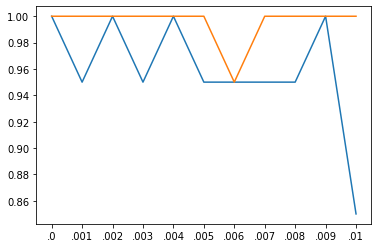

In [23]:
sns.lineplot(data=test1.consistencies.mean())
sns.lineplot(data=test1bim.consistencies.mean())
# sns.lineplot(data=normal.std_differences.mean())